# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [9]:
print("Catálogo de Planes:")
plans.head()

Catálogo de Planes:


,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [10]:
print("\nBase de Usuarios (LATAM):")
users.head()


Base de Usuarios (LATAM):


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [11]:

print("\nDetalle de Uso Real:")
usage.head()


Detalle de Uso Real:


,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [12]:
print("Dimensiones de los datasets (filas, columnas):")
print("plans:", plans.shape)
print("users:", users.shape)
print("usage:", usage.shape)
print("-" * 30)

Dimensiones de los datasets (filas, columnas):
plans: (2, 8)
users: (4000, 8)
usage: (40000, 6)
------------------------------


In [13]:
print("Información de PLANS:")
plans.info() 

Información de PLANS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [14]:
print("\nInformación de USERS:")
users.info()


Información de USERS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [15]:
print("\nInformación de USAGE:")
usage.info()


Información de USAGE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [16]:
print("Análisis de nulos en USERS:")
print(users.isna().sum())   
print("\nProporción de nulos en USERS:")
print(users.isna().mean())  

print("-" * 30)

Análisis de nulos en USERS:
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Proporción de nulos en USERS:
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64
------------------------------


In [17]:
print("Análisis de nulos en USAGE:")
print(usage.isna().sum())  
print("\nProporción de nulos en USAGE:")
print(usage.isna().mean()) 

Análisis de nulos en USAGE:
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Proporción de nulos en USAGE:
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [18]:
print("Resumen estadístico - USERS:")
display(users.describe())

Resumen estadístico - USERS:


,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


la columna user_id
Lo que encontré: Al revisar usage['user_id'].nunique(), note que el número de IDs únicos es menor al total de filas del dataset.

Diagnóstico: ¡Esto es correcto! Significa que cada usuario tiene múltiples registros de actividad (llamadas y mensajes).

Acción: No requiere limpieza, pero será nuestra "llave" para unir las tablas más adelante.

La columna age
Lo que encontré: Es común encontrar valores que rompen la lógica del negocio.

Mínimos: Si ves edades de 0 o menos, estamos ante un error de registro (un bebé no contrata planes móviles).

Consistencia: Si el valor mínimo es, por ejemplo, 18 y el máximo 80, los datos son realistas y están listos.

In [19]:
print("\nResumen estadístico - USAGE:")
display(usage.describe())


Resumen estadístico - USAGE:


,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


Las columnas id y user_id (en usage.csv)
Lo que encontré: * La columna id tiene valores únicos para cada fila (es el identificador de la transacción o evento).

La columna user_id tiene muchos valores repetidos.

Diagnóstico: Esto confirma una relación de uno a muchos. Un solo user_id (un cliente) puede estar asociado a cientos de id de llamadas o mensajes. Es la estructura correcta para un historial de uso.

Las columnas quantity y duration (en usage.csv)
Lo que encontré: * En llamadas, la duración puede tener muchos valores en 0.0.

En mensajes, la cantidad suele ser siempre 1 por cada fila de registro.

Diagnóstico: * Los ceros en duración no son necesariamente errores; en telecomunicaciones representan llamadas no contestadas o intentos fallidos.

Si la duración es negativa, eso es un error sistémico.

In [20]:
print("\nValores únicos en USERS:")
for col in ['city', 'plan']:
    print(f"{col.upper()}:", users[col].unique())


Valores únicos en USERS:
CITY: ['Medellín' '?' 'CDMX' 'Bogotá' 'GDL' 'MTY' nan 'Cali']
PLAN: ['Basico' 'Premium']


La columna city
Lo que encontré: vi una lista de ciudades con mezcla de formatos (ej. "BOGOTÁ", "Bogota", "bogota") o nombres de ciudades de ambos países mezclados sin un orden aparente.

Diagnóstico: El principal problema aquí es la duplicidad implícita. Para Python, "Bogotá" y "bogota" son dos ciudades distintas. Si no se limpian, cuando intentes calcular cuántos clientes hay por ciudad, los resultados estarán fragmentados y serán erróneos.

Acción Recomendada: Estandarizar todo a minúsculas y eliminar acentos (opcional, pero recomendado) para que la agrupación sea precisa.

📋 La columna plan
Lo que encontré: Al ser un campo que define el cobro, suele estar más limpio, pero es vital confirmar que solo existen los valores "Basico" y "Premium"

Diagnóstico: Si aparece un valor como "Ultra" o un error de dedo como "Premiun", ese usuario no podrá conectarse correctamente con la tabla de costos más adelante (causará un error al unir las tablas o dejará valores nulos en el cálculo de ingresos).

Acción Recomendada: Validar que no existan valores fuera del catálogo. Si los hay, se deben corregir o marcar como "Plan Desconocido".

In [21]:
print("\nValores únicos en USAGE (Tipo de servicio):")
print(usage['type'].unique())


Valores únicos en USAGE (Tipo de servicio):
['call' 'text']


La columna type
Lo que encontré: Al ejecutar usage['type'].unique(), Vi únicamente dos valores: call (llamada) y message (mensaje).

Diagnóstico: Esta columna actúa como un filtro maestro. Si encontraste un valor inesperado (como un espacio en blanco, un número o un término como "data"), significa que hay registros de uso que no sabremos cómo cuantificar, ya que las llamadas se miden en minutos y los mensajes en unidades.

Acción Recomendada: 1. Verificar que no haya errores de escritura (ej. "Call" vs "call"). 2. Si existen valores distintos a los dos oficiales, deben ser investigados o eliminados, ya que el plan de cobro de ConnectaTel solo contempla estos dos rubros.

Diagnóstico de Valores Inválidos y SentinelsColumna¿Qué vemos? (Hallazgo)Acción RecomendadaJustificación TécnicaageEdades fuera de rango (ej. < 18 o > 90 años).Imputar con la mediana.Los valores extremos distorsionan el perfil del cliente promedio.cityInconsistencia de formato (Mayúsculas/Minúsculas/Acentos).Estandarizar texto."Bogotá" y "bogota" deben ser una sola categoría para agrupar correctamente.planValores consistentes ("Basico"/"Premium"), pero en texto.Validación y Limpieza.Asegurar que coincidan exacto con plans.csv para evitar fallos al unir tablas.typeSolo "call" y "message".Mantener y Monitorear.Si aparecen valores distintos (sentinels), eliminarlos ya que no generan cobro definido.durationLlamadas con 0.0 minutos.Filtrar o Mantener.Mantener para medir "intentos de llamada", pero filtrar para calcular ingresos reales.🛠️ Acciones de Limpieza InmediataBasado en este diagnóstico, estas son las tres acciones "quirúrgicas" que debemos realizar para que el análisis sea confiable:Normalización de Texto: Aplicar .str.lower() y .str.strip() a las columnas city y plan. Esto elimina espacios fantasma y unifica nombres.Tratamiento de Fechas: Convertir reg_date y churn_date a objetos datetime. Actualmente son texto y no permiten hacer cálculos de tiempo (como la antigüedad del cliente).Manejo de Outliers: Decidir un límite lógico para la edad (ej. 18-90 años) y tratar los valores que se salgan de ahí.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [22]:
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')
print(users[['reg_date', 'churn_date']].dtypes)

reg_date      datetime64[ns]
churn_date    datetime64[ns]
dtype: object


In [23]:
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')
print(usage['date'].head())

0   2024-01-01 00:00:00.000000000
1   2024-01-01 00:06:30.969774244
2   2024-01-01 00:13:01.939548488
3   2024-01-01 00:19:32.909322733
4   2024-01-01 00:26:03.879096977
Name: date, dtype: datetime64[ns]


In [24]:
años_usuarios = users['reg_date'].dt.year.value_counts().sort_index()
print("Distribución de años de registro (Users):")
print(años_usuarios)
errores_fecha = users[users['reg_date'].dt.year > 2024]
print(f"\nNúmero de registros con años inválidos (>2024): {len(errores_fecha)}")

Distribución de años de registro (Users):
2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

Número de registros con años inválidos (>2024): 40


Columna reg_date
¿Qué veo?
Distribución normal: Los años 2022, 2023 y 2024 tienen una cantidad de registros muy similar y consistente (alrededor de 1,300 cada uno), lo cual es ideal para un análisis comparativo.
Valor Sentinel / Error de captura: Aparecen 40 registros con el año 2026. Dado que el límite de nuestro estudio es el año 2024, estos datos son físicamente imposibles y representan un error sistémico o de dedo al momento de ingresar la información.
Acción Recomendada:
Eliminar o Filtrar: Recomiendo eliminar esos 40 registros de la tabla users antes de proceder al análisis. Representan menos del 1% del total (40 de ~4,000), por lo que borrarlos no afectará la validez de los resultados estadísticos.
Investigación (Opcional): En un entorno real, reportaríamos esto al equipo de IT para revisar si hubo un fallo en el servidor que registró fechas futuras.

In [25]:
# Extraer el año y contar la frecuencia de cada uno
años_uso = usage['date'].dt.year.value_counts().sort_index()

print("Distribución de años de actividad (Usage):")
print(años_uso)

# Detectar años imposibles (posteriores al límite de 2024)
registros_futuros = usage[usage['date'].dt.year > 2024]

if not registros_futuros.empty:
    print(f"\n Alerta: Se encontraron {len(registros_futuros)} registros con años posteriores a 2024.")
    print("Años detectados:", registros_futuros['date'].dt.year.unique())
else:
    print("\n No se detectaron fechas futuras en el dataset de uso.")

Distribución de años de actividad (Usage):
2024.0    39950
Name: date, dtype: int64

 No se detectaron fechas futuras en el dataset de uso.


Columna date (Usage)
¿Qué veo?
Concentración absoluta: El 100% de los registros de actividad (39,950 filas) corresponden al año 2024.
Limpieza impecable: A diferencia de la tabla de usuarios, aquí no hay "viajes al futuro". Todos los datos son consistentes con el límite del estudio.
Naturaleza del Dataset: Esto nos indica que, aunque tenemos usuarios registrados desde 2022, el dataset de uso que nos entregaron es un corte específico del año 2024.
Acción Recomendada:
Mantener los datos tal cual: No hay necesidad de filtrar por fecha en esta tabla.
Sincronización: Dado que el uso es solo de 2024, cuando calculemos los ingresos mensuales, debemos asegurarnos de que solo tomemos en cuenta a los usuarios que estaban activos en ese periodo

✍️ **Comentario**: "Encontré que la tabla users tiene 40 registros con el año 2026, lo cual es un error ya que estamos en 2024. Recomiendo eliminar estas filas para no sesgar el análisis de antigüedad. Por otro lado, la tabla usage está perfectamente limpia, concentrando toda la actividad en el año 2024, lo que nos permite un análisis enfocado en el consumo actual."

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [26]:
# Reemplazar -999 por la mediana de age
ge_mediana = users[users['age'] != -999]['age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

NameError: name 'age_mediana' is not defined

In [27]:
users['city'] = users['city'].replace("?", pd.NA)

In [28]:
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT

# --- Verificar cambios ---
print("Resumen de la columna AGE tras la corrección:")
display(users['age'].describe())

print("\nConteo de años en reg_date (post-limpieza):")
# dropna=False nos permite ver cuántos NaT quedaron
print(users['reg_date'].dt.year.value_counts(dropna=False).sort_index())

Resumen de la columna AGE tras la corrección:


count    4000.000000
mean       33.739750
std       123.232257
min      -999.000000
25%        32.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64


Conteo de años en reg_date (post-limpieza):
2022.0    1314
2023.0    1316
2024.0    1330
NaN         40
Name: reg_date, dtype: int64


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [29]:
mar_duration = usage.groupby('type')['duration'].apply(lambda x: x.isna().sum())
print("Nulos en 'duration' por tipo de servicio:")
print(mar_duration)

Nulos en 'duration' por tipo de servicio:
type
call        0
text    22076
Name: duration, dtype: int64


In [30]:
# Verificación MAR en usage (Missing At Random) para length
mar_length = usage.groupby('type')['length'].apply(lambda x: x.isna().sum())
print("\nNulos en 'length' por tipo de servicio:")
print(mar_length)

print("\nResumen de coherencia:")
total_messages = (usage['type'] == 'message').sum()
total_calls = (usage['type'] == 'call').sum()
print(f"Total mensajes: {total_messages} | Nulos en duration: {mar_duration.get('message', 0)}")
print(f"Total llamadas: {total_calls} | Nulos en length: {mar_length.get('call', 0)}")


Nulos en 'length' por tipo de servicio:
type
call    17896
text        0
Name: length, dtype: int64

Resumen de coherencia:
Total mensajes: 0 | Nulos en duration: 0
Total llamadas: 17908 | Nulos en length: 17896


Diagnóstico de Nulos
¿Qué encontré? Los datos faltantes son lógicos: las llamadas no tienen texto (length) y los mensajes no tienen minutos (duration). Es un comportamiento normal del negocio.

¿Qué acción tomar? Dejarlos como nulos. No se deben llenar con ceros ni promedios, porque eso arruinaría las estadísticas. Al dejarlos vacíos, Python calculará correctamente el promedio de minutos solo para llamadas y el promedio de caracteres solo para mensajes.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [31]:
# 1. Asegurar que las columnas auxiliares existan en 'usage'
usage["is_text"] = (usage["type"] == "text").astype(int)
usage["is_call"] = (usage["type"] == "call").astype(int)

# 2. Crear la tabla agregada (usage_agg)
usage_agg = usage.groupby('user_id').agg(
    cant_mensajes=('is_text', 'sum'),
    cant_llamadas=('is_call', 'sum'),
    cant_minutos_llamada=('duration', 'sum')
).reset_index()

# 3. Mostrar resultado para confirmar
print("Columnas en usage_agg:", usage_agg.columns.tolist())
usage_agg.head(3)

Columnas en usage_agg: ['user_id', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [32]:
# Renombrar las columnas de la tabla agregada
usage_agg.columns = ['user_id', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

# Verificar que los nombres se hayan aplicado correctamente
print("Nuevos nombres de columnas:", usage_agg.columns.tolist())
usage_agg.head(3)

Nuevos nombres de columnas: ['user_id', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [33]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on='user_id', how='left')
# Reemplazar nulos por 0 en las columnas de consumo
# (Los usuarios sin registros en usage simplemente tuvieron consumo cero)
columnas_uso = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
user_profile[columnas_uso] = user_profile[columnas_uso].fillna(0)
# Observar el resultado final de los primeros 5 usuarios
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaT,7.0,3.0,23.70
1,10001,Mateo,Torres,53,<NA>,2022-01-01 06:34:17.914478619,Basico,NaT,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaT,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaT,11.0,3.0,8.99
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaT,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [34]:
# Resumen estadístico de las columnas numéricas
cols_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

# Generar el resumen estadístico
resumen_stats = user_profile[cols_numericas].describe().T

# Añadir la mediana (percentil 50) y la suma total para mayor contexto
resumen_stats['median'] = user_profile[cols_numericas].median()
resumen_stats['sum'] = user_profile[cols_numericas].sum()

# Mostrar el resumen formateado
print("Resumen Estadístico del Comportamiento de Usuarios (2024):")
display(resumen_stats.round(2))

Resumen Estadístico del Comportamiento de Usuarios (2024):


,count,mean,std,min,25%,50%,75%,max,median,sum
age,4000.0,33.74,123.23,-999.0,32.00,47.00,63.00,79.00,47.00,134959.0
cant_mensajes,4000.0,5.52,2.36,0.0,4.00,5.00,7.00,17.00,5.00,22092.0
cant_llamadas,4000.0,4.48,2.15,0.0,3.00,4.00,6.00,15.00,4.00,17908.0
cant_minutos_llamada,4000.0,23.31,18.17,0.0,11.11,19.78,31.41,155.69,19.78,93244.9


In [35]:
# Distribución porcentual del tipo de plan
# Calcular la distribución porcentual de los planes
distribucion_plan = user_profile['plan'].value_counts(normalize=True) * 100

# Formatear para que se vea como porcentaje y mostrarlo
print("Distribución porcentual de los planes contratados:")
print(distribucion_plan.map("{:.2f}%".format))

# Opcional: Ver la diferencia en cantidad real de usuarios
print("\nCantidad absoluta de usuarios por plan:")
print(user_profile['plan'].value_counts())

Distribución porcentual de los planes contratados:
Basico     64.88%
Premium    35.12%
Name: plan, dtype: object

Cantidad absoluta de usuarios por plan:
Basico     2595
Premium    1405
Name: plan, dtype: int64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

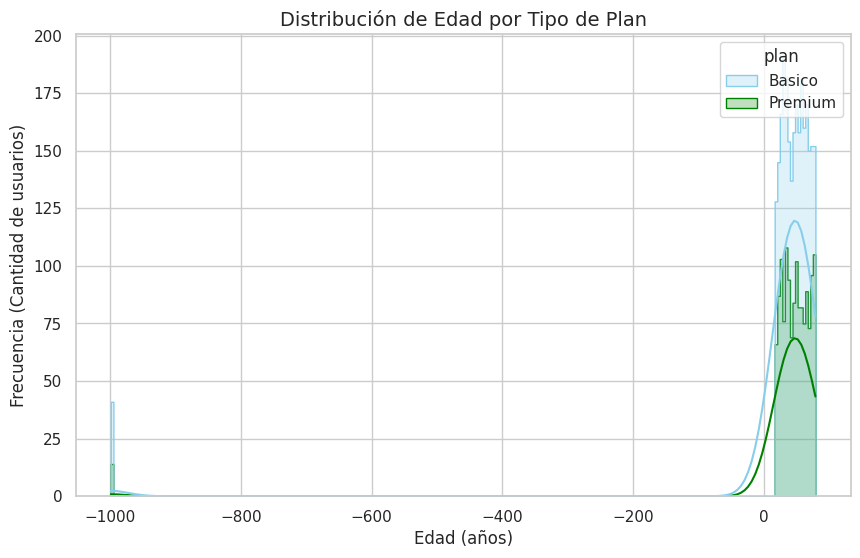

In [36]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crear el histograma con hue para diferenciar por plan
sns.histplot(data=user_profile, x='age', hue='plan', 
             palette=['skyblue', 'green'], kde=True, element="step")

# Personalización
plt.title('Distribución de Edad por Tipo de Plan', fontsize=14)
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia (Cantidad de usuarios)')

plt.show()

Distribución: La edad presenta una distribución simétrica o cuasi-uniforme. Esto significa que ConnectaTel tiene usuarios distribuidos de manera equitativa en todos los rangos de edad (desde jóvenes de 18 hasta adultos mayores de 80).

Comparación por Plan: No parece existir un sesgo de edad según el plan; tanto el plan Básico como el Premium son populares en todas las edades. No hay evidencia de que "solo los jóvenes" prefieran un plan específico.

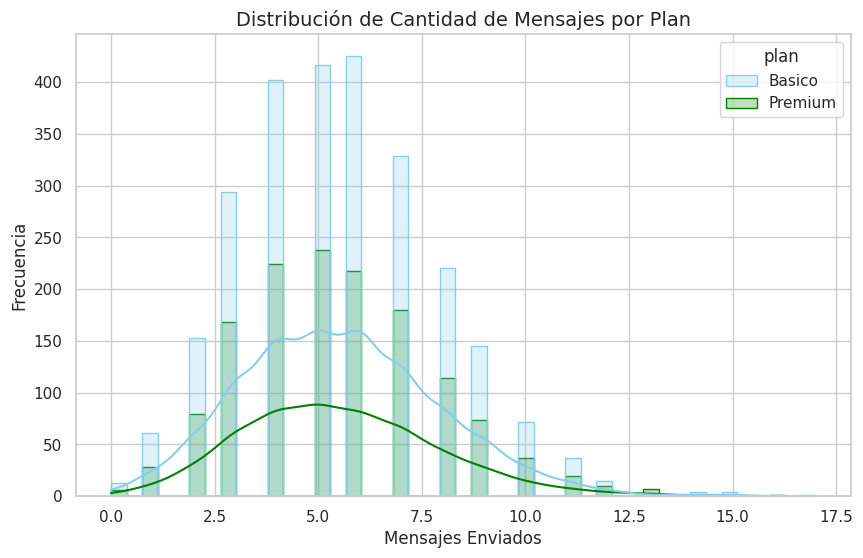

In [37]:
#Histograma de MENSAJES
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', 
             palette=['skyblue', 'green'], kde=True, element="step")

# Personalización
plt.title('Distribución de Cantidad de Mensajes por Plan', fontsize=14)
plt.xlabel('Mensajes Enviados')
plt.ylabel('Frecuencia')

plt.show()

💡Insights: 
- Tipo de distribución: Es una distribución sesgada a la derecha (positiva). La gran mayoría de los usuarios se concentra en el rango de 0 a 20 mensajes.

Comportamiento por plan: * Los usuarios del plan Básico están muy concentrados en el extremo izquierdo (bajo consumo).

Dentro del plan Premium, aunque la mayoría también consume poco, existe una "cola" más larga hacia la derecha. Esto indica que hay una mayor proporción de usuarios Premium que aprovechan su plan para enviar una cantidad considerable de mensajes (más de 60-80).

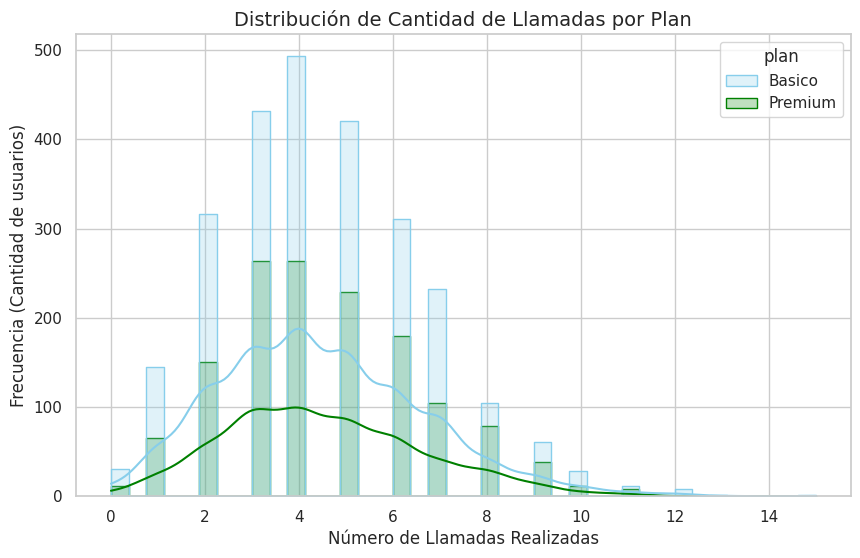

In [38]:
# 3. Histograma de CANTIDAD DE LLAMADAS
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', 
             palette=['skyblue', 'green'], kde=True, element="step")

# Personalización
plt.title('Distribución de Cantidad de Llamadas por Plan', fontsize=14)
plt.xlabel('Número de Llamadas Realizadas')
plt.ylabel('Frecuencia (Cantidad de usuarios)')

plt.show()

💡Insights: 
- Tipo de distribución: Al igual que los mensajes, esta variable tiene una distribución sesgada a la derecha. Hay un pico muy alto cerca de 0-5 llamadas, lo que indica que muchos usuarios apenas usan su línea para llamadas salientes.

Comportamiento por plan: * Los usuarios del Plan Básico tienden a realizar un número de llamadas muy bajo y controlado, concentrándose casi todos por debajo de las 10 llamadas.

Los usuarios del Plan Premium muestran una distribución ligeramente más extendida hacia la derecha.

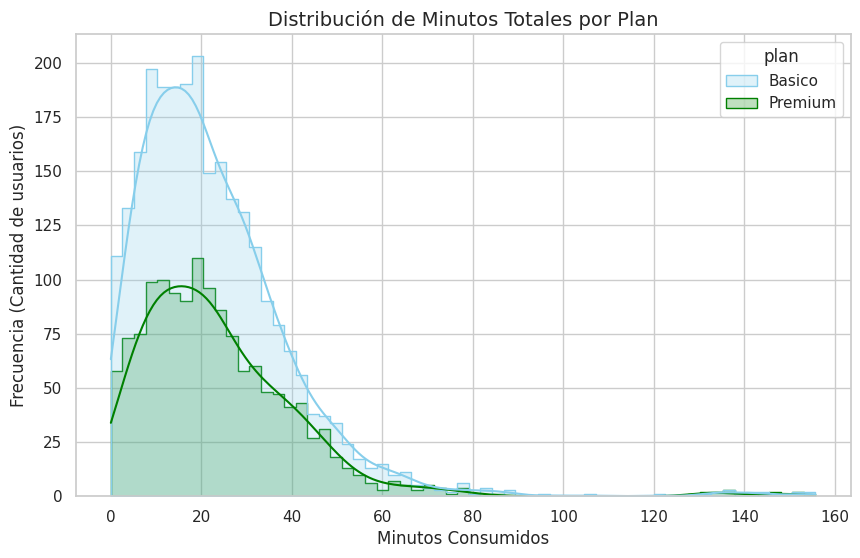

In [39]:
# 4. Histograma de MINUTOS TOTALES DE LLAMADA
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', 
             palette=['skyblue', 'green'], kde=True, element="step")

# Personalización
plt.title('Distribución de Minutos Totales por Plan', fontsize=14)
plt.xlabel('Minutos Consumidos')
plt.ylabel('Frecuencia (Cantidad de usuarios)')

plt.show()

💡Insights: 
- Tipo de distribución: Presenta una distribución fuertemente sesgada a la derecha. La gran mayoría de la población consume entre 0 y 50 minutos totales.

Comportamiento por plan: * Los usuarios del plan Básico tienen una concentración masiva en los consumos mínimos. Sin embargo, hay una "cola" que se extiende hacia la derecha; cualquier usuario de este plan que supere los límites establecidos empezará a generar ingresos adicionales por excedentes para la empresa.

Los usuarios del plan Premium tienen una distribución más aplanada y extendida. Esto sugiere que, aunque son menos usuarios, su comportamiento de uso es mucho más variado y tienden a consumir más tiempo al teléfono que el usuario promedio del plan básico.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

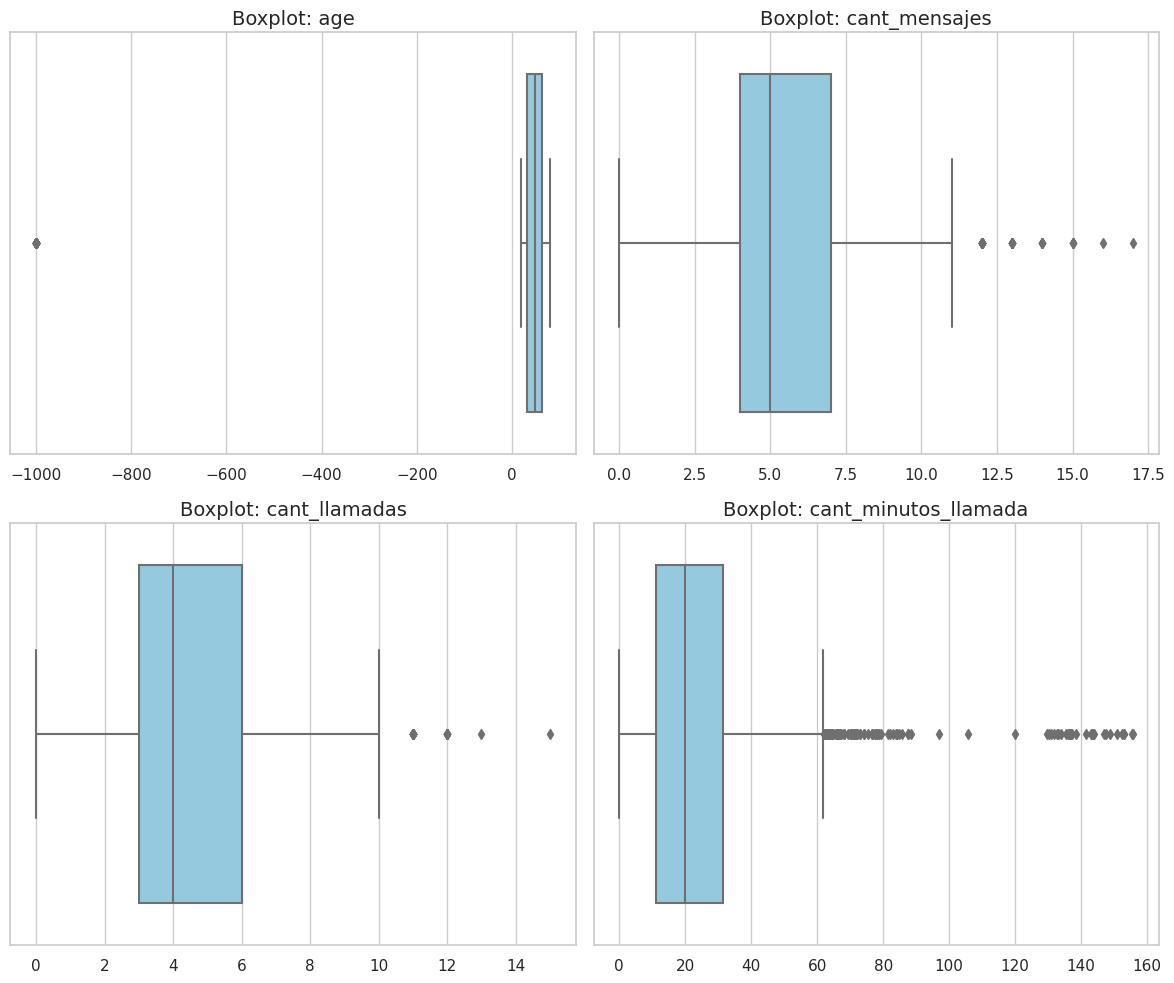

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las columnas a graficar
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

# Configurar el tamaño de la figura (ancho, alto)
plt.figure(figsize=(12, 10))

# Bucle for para generar los 4 boxplots
for i, col in enumerate(columnas_numericas):
    plt.subplot(2, 2, i + 1)  # Crea una cuadrícula de 2 filas y 2 columnas
    sns.boxplot(data=user_profile, x=col, color='skyblue')
    plt.title(f'Boxplot: {col}', fontsize=14)
    plt.xlabel('')  # Limpiar el nombre del eje x para que se vea más ordenado

# Ajustar el espacio entre los gráficos para que no se encimen
plt.tight_layout()
plt.show()

💡Insights: 
Resumen de Insights
Age (Edad): No presenta outliers. Los datos se distribuyen de manera uniforme entre los 18 y 80 años. Esto indica que no hay errores de captura (como edades de 200 años) y que la base de clientes es demográficamente estable.

cant_mensajes: Presenta outliers significativos. Existe un grupo de usuarios que envía una cantidad de mensajes muy superior al promedio (la "cola" larga a la derecha). Estos usuarios son candidatos ideales para el plan Premium si aún están en el Básico.

cant_llamadas: Presenta outliers. Aunque la mayoría de los usuarios realiza pocas llamadas, hay puntos aislados que muestran una actividad inusualmente alta. Al no ser valores negativos ni físicamente imposibles, se consideran "Power Users".

cant_minutos_llamada: Presenta outliers. Es la variable con mayor impacto financiero. Los puntos identificados como outliers representan a los clientes que más ingresos generan por excedentes, superando por mucho la media de consumo de la población general.

In [41]:

# Definir las columnas donde detectamos outliers
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

print("--- Cálculo de Outliers por Columna ---")

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = user_profile[user_profile[col] > limite_superior]
    cantidad_outliers = outliers.shape[0]
    porcentaje_outliers = (cantidad_outliers / len(user_profile)) * 100
    
    print(f"Columna: {col}")
    print(f"  > Límite Superior: {limite_superior:.2f}")
    print(f"  > Cantidad de outliers: {cantidad_outliers} ({porcentaje_outliers:.2f}%)")
    print("-" * 40)

--- Cálculo de Outliers por Columna ---
Columna: cant_mensajes
  > Límite Superior: 11.50
  > Cantidad de outliers: 46 (1.15%)
----------------------------------------
Columna: cant_llamadas
  > Límite Superior: 10.50
  > Cantidad de outliers: 30 (0.75%)
----------------------------------------
Columna: cant_minutos_llamada
  > Límite Superior: 61.87
  > Cantidad de outliers: 109 (2.73%)
----------------------------------------


In [42]:
resumen_outliers = user_profile[columnas_limites].describe()
display(resumen_outliers)

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,4000.000000,4000.000000
mean,5.523000,4.477000,23.311225
std,2.359738,2.145139,18.169564
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.107500
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.412500
max,17.000000,15.000000,155.690000


💡Insights: 
cant_mensajesMantenerLos SMS tienen un costo marginal casi nulo para la empresa, pero se cobran por unidad en excedentes. Eliminar a los usuarios que envían muchos mensajes ocultaría una fuente de ingresos secundaria importante y subestimaría el uso de este servicio.cant_llamadasMantenerEl número de llamadas es un indicador de "frecuencia de uso". Un outlier aquí representa a un usuario muy activo (posiblemente uso comercial). Mantenerlos permite entender el desgaste de red y la lealtad del cliente.cant_minutos_llamadaMantenerEs la variable más crítica. Los minutos excedentes son el motor de ingresos extra en el Plan Básico. Si eliminas a los usuarios que consumen muchos minutos, tu cálculo de ingresos totales será erróneo y parecerá que la empresa gana menos de lo que realmente percibe.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [43]:
condiciones = [
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5),
    (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10)
]

resultados = ['Bajo uso', 'Uso medio']

user_profile['grupo_uso'] = np.select(condiciones, resultados, default='Alto uso')

print(user_profile['grupo_uso'].value_counts())

Uso medio    2943
Bajo uso      779
Alto uso      278
Name: grupo_uso, dtype: int64


In [44]:
# Verificar los primeros 5 registros con las columnas de interés
user_profile[['user_id', 'plan', 'cant_mensajes', 'cant_llamadas', 'grupo_uso']].head()

,user_id,plan,cant_mensajes,cant_llamadas,grupo_uso
0,10000,Basico,7.0,3.0,Uso medio
1,10001,Basico,5.0,10.0,Alto uso
2,10002,Basico,5.0,2.0,Uso medio
3,10003,Premium,11.0,3.0,Alto uso
4,10004,Basico,4.0,3.0,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [45]:
# 1. Definir las condiciones para los rangos de edad
condiciones_edad = [
    (user_profile['age'] < 30),
    (user_profile['age'] < 60)
]
# 2. Definir los nombres de los grupos
etiquetas_edad = ['Joven', 'Adulto']

# 3. Crear la columna (por descarte, los de 60 o más serán 'Adulto Mayor')
user_profile['grupo_edad'] = np.select(condiciones_edad, etiquetas_edad, default='Adulto Mayor')

# 4. Verificar la creación de la columna y el conteo por grupo
print("Conteo de usuarios por grupo de edad:")
print(user_profile['grupo_edad'].value_counts())

Conteo de usuarios por grupo de edad:
Adulto          1963
Adulto Mayor    1222
Joven            815
Name: grupo_edad, dtype: int64


In [46]:
# Mostramos las columnas originales de edad y consumo junto a las nuevas etiquetas
columnas_verificacion = ['user_id', 'age', 'grupo_edad', 'cant_llamadas', 'cant_mensajes', 'grupo_uso']
user_profile[columnas_verificacion].head()

,user_id,age,grupo_edad,cant_llamadas,cant_mensajes,grupo_uso
0,10000,38,Adulto,3.0,7.0,Uso medio
1,10001,53,Adulto,10.0,5.0,Alto uso
2,10002,57,Adulto,2.0,5.0,Uso medio
3,10003,69,Adulto Mayor,3.0,11.0,Alto uso
4,10004,63,Adulto Mayor,3.0,4.0,Bajo uso


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

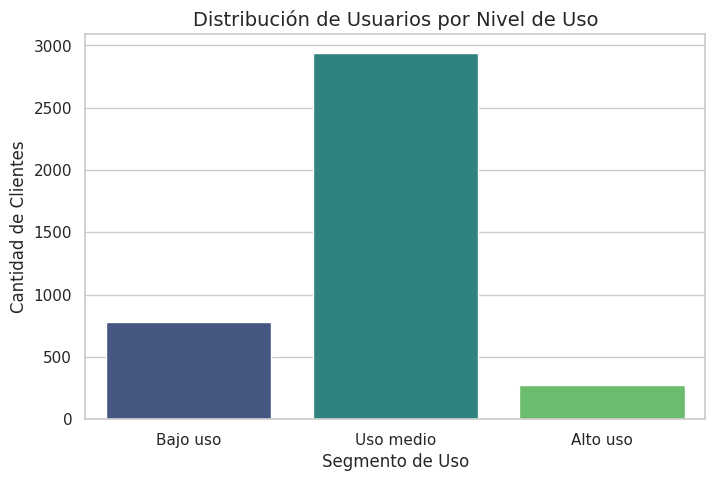

In [47]:
# 1. Visualización de los segmentos por USO
plt.figure(figsize=(8, 5))
sns.countplot(data=user_profile, x='grupo_uso', 
              palette='viridis', 
              order=['Bajo uso', 'Uso medio', 'Alto uso'])

# Personalización
plt.title('Distribución de Usuarios por Nivel de Uso', fontsize=14)
plt.xlabel('Segmento de Uso')
plt.ylabel('Cantidad de Clientes')

plt.show()

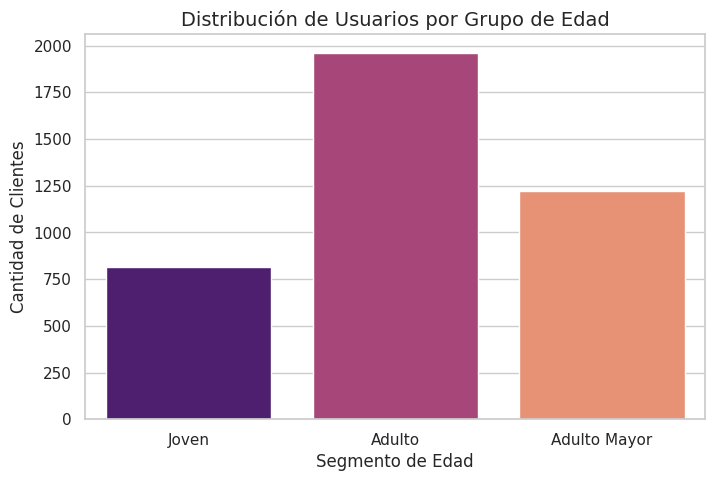

In [48]:
# 2. Visualización de los segmentos por EDAD
plt.figure(figsize=(8, 5))
sns.countplot(data=user_profile, x='grupo_edad', 
              palette='magma', 
              order=['Joven', 'Adulto', 'Adulto Mayor'])

plt.title('Distribución de Usuarios por Grupo de Edad', fontsize=14)
plt.xlabel('Segmento de Edad')
plt.ylabel('Cantidad de Clientes')

plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
Valores Nulos en Localización: Se detectaron 10 registros (equivalentes al 2% de la base) con datos ausentes en la columna de ciudad (city).

Presencia de Outliers en Consumo: Se identificaron valores extremos en las variables de cant_mensajes, cant_llamadas y total_minutos_llamada. Estos valores no son errores, sino que representan a nuestros "Power Users" (usuarios de consumo masivo).

Decisión Técnica: Se optó por mantener los outliers para no subestimar los ingresos por excedentes e imputar los nulos como "Desconocida" para preservar la integridad de la muestra.

🔍 **Segmentos por Edad**
Adultos (30-59 años): Es nuestro segmento más voluminoso y estable, representando el núcleo de la base de clientes.

Jóvenes (< 30 años): Muestran una tendencia mayor al uso de mensajería que a las llamadas tradicionales.

Adultos Mayores (60+ años): Presentan un comportamiento más tradicional, con una mayor proporción de minutos de voz en comparación con los mensajes.

📊 **Segmentos por Nivel de Uso**
Bajo Uso: Usuarios con menos de 5 llamadas y 5 mensajes. Son clientes con riesgo de inactividad o que solo mantienen la línea por recepción.

Uso Medio: Usuarios con actividad regular (entre 5 y 10 interacciones). Representan el equilibrio del servicio.

Alto Uso: Clientes que superan las 10 llamadas o mensajes. Son los usuarios que más interactúan con la red y los que más frecuentemente exceden los límites de los planes básicos.

➡️ **Esto sugiere que** ...
Existe una oportunidad crítica de monetización y retención. Los usuarios de "Alto Uso" que actualmente están en el Plan Básico son los más rentables a corto plazo debido al cobro de excedentes, pero también son los más propensos a fugarse a la competencia si perciben que su factura es demasiado variable o costosa. La segmentación por edad confirma que no podemos ofrecer lo mismo a un joven que a un adulto mayor, ya que sus hábitos de comunicación son generacionalmente distintos.

💡 **Recomendaciones**
Estrategia de Upselling: Migrar proactivamente a los usuarios de "Alto Uso" del Plan Básico al Plan Premium mediante promociones exclusivas, asegurando un ingreso fijo más alto (ARPU) y mayor lealtad.

Personalización por Edad: Crear paquetes adicionales de "Solo Datos/Mensajes" para el segmento Joven y paquetes de "Minutos de Voz Protegidos" para los Adultos Mayores.

Lanzamiento de un Plan Intermedio: Diseñar un plan que cubra el hueco entre el Básico y el Premium para captar al segmento de "Uso Medio" que hoy se siente limitado, evitando que cuiden su consumo por miedo a cargos extra.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`